In [16]:
using SLMTools


divImgs, divImgNames = loadDir("./test/test_data/test_images_B/OffsetParabolas/", ".bmp"; L=5.86)
linImgs, linImgNames = loadDir("./test/test_data/test_images_B/LinearPhases/", ".bmp"; L=5.86)
x0, xhspan = 1050, 150 # x0 is the center of the ROI, xhspan is half the width of the ROI, use 1050, 150 for the test images
y0, yhspan = 690, 150 # y0 is the center of the ROI, yhspan is half the height of the ROI, use 690, 150 for the test images
roi = ((y0-yhspan):(y0+yhspan), (x0-xhspan):(x0+xhspan))
indstart = 1
(xi, yi), angle = getOrientation(linImgs[indstart:end], linImgNames[indstart:end], roi=roi)

([3014.253431837355, 5932.230865617625], 0.007640920478460817)

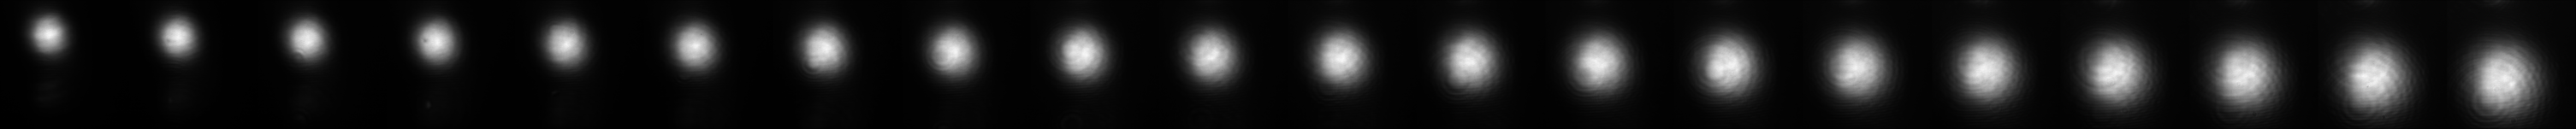

In [17]:
look((d[roi...] for d in divImgs[indstart:end])...)
# divImgs[1].L

In [11]:
SLMLat=(1:1024,1:1024).*17.0

(17.0:17.0:17408.0, 17.0:17.0:17408.0)

In [18]:
flambda = 1.064e5 #focal times wavelength in microns
interps = dualate(divImgs[indstart:end], SLMLat, [xi, yi], angle, flambda, roi=roi, naturalize=true);

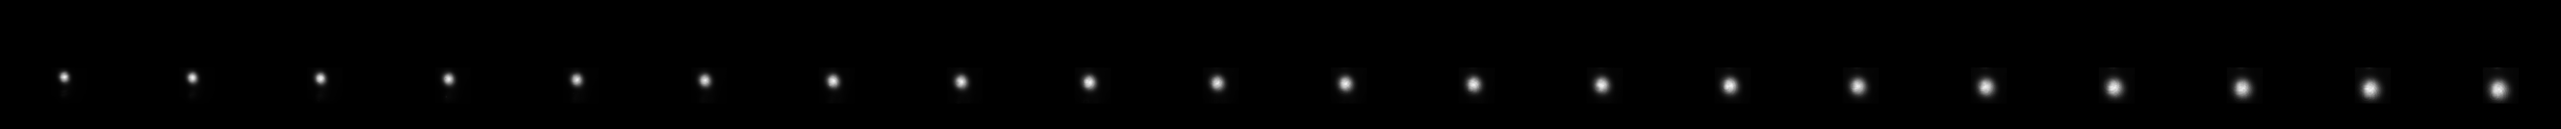

In [20]:
look(interps...)

In [25]:
dualShiftLattice(SLMLat,flambda)

(-3129.4117647058824:6.112132352941177:3123.299632352941, -3129.4117647058824:6.112132352941177:3123.299632352941)

In [29]:
# natlat(1024) = -16.0:0.03125:15.96875
#0.03125*u = 6.11 microns #new unit u
(0.03125/6.11)^-1
32*195.5 # this should be the width of the dSl(SLMLat,flambda) lattice in microns


6256.0

In [37]:
scale = 256
L0=natlat((1024,1024))
step(L0[1])
αs = 2 * divImgNames/(scale*step(L0[1]))^2;

β = 32 / (scale * step(L0[1]))*[1,0]

2-element Vector{Float64}:
 4.0
 0.0

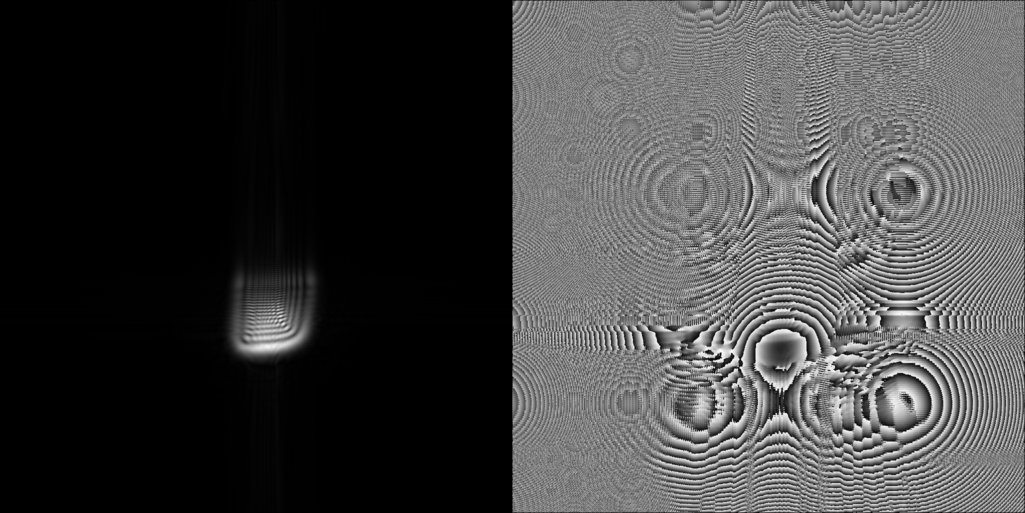

In [39]:
winds = window.(interps, 300)
g2root = coarsen(interps[end][winds[end]],4)
g2target = coarsen(interps[1][winds[1]], 4)
beam = pdotBeamEstimate(g2root, g2target,αs[end],αs[1],β,β,0.001,LFine=L0);
look(beam)
# look(interps[end][winds[end]])

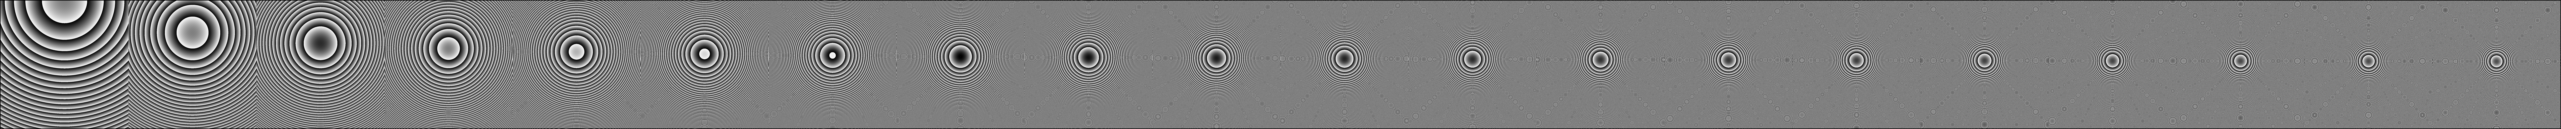

In [51]:
phis = [lfRampedParabola(RealPhase,(1024,1024),scale, (513,513), 2*a, Tuple(β))|>wrap for a in divImgNames]
look(phis...)

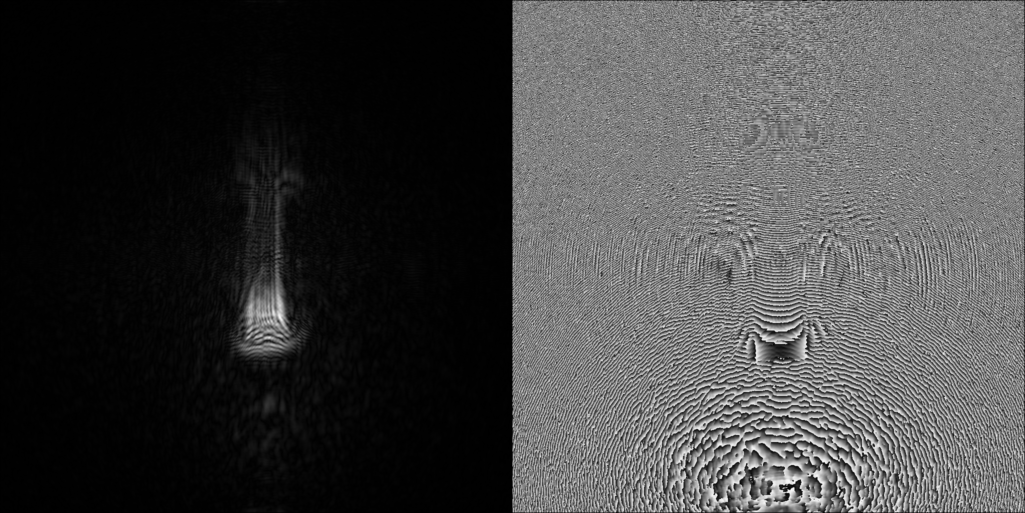

In [52]:
beam2 = pdgs(interps |> Tuple, phis |> Tuple, 50, beam);
look(beam2)

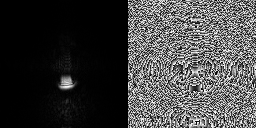

In [54]:
target = lfRing(Intensity,(1024,1024),8.0,2.0)
look(target);
dstarget = coarsen(target,16)
dsbeam = coarsen(beam2,8)
look(dsbeam)

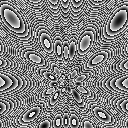

In [56]:
otphi = otPhase(dsbeam|>square,dstarget,0.001)
look(otphi)


In [60]:
otphibig = upsample(otphi,L0);
# look(otphibig)

1024×1024 Matrix{Float64}:
 202.225  202.674  203.123  203.572  …  219.496  219.043  218.59   218.138
 202.503  202.952  203.401  203.85      219.767  219.315  218.862  218.41
 202.783  203.231  203.679  204.128     220.039  219.587  219.135  218.683
 203.062  203.51   203.958  204.407     220.312  219.86   219.408  218.956
 325.438  325.817  326.196  326.576     337.206  336.816  336.426  336.036
 325.014  325.393  325.772  326.152  …  336.794  336.403  336.013  335.623
 324.59   324.969  325.349  325.729     336.382  335.991  335.6    335.21
 324.166  324.545  324.925  325.306     335.97   335.579  335.188  334.797
 323.742  324.122  324.502  324.883     335.559  335.167  334.776  334.385
 323.319  323.699  324.08   324.46      335.148  334.756  334.364  333.973
   ⋮                                 ⋱    ⋮                        
 201.947  202.396  202.845  203.295  …  219.225  218.772  218.319  217.866
 202.225  202.674  203.123  203.572     219.496  219.043  218.59   218.138
 202.50

LatticeField{RealPhase, Float64, 2}
Lattice: (-16.0:0.03125:15.96875, -16.0:0.03125:15.96875)


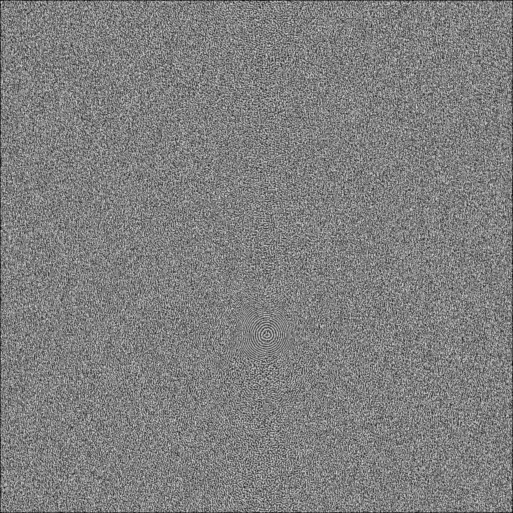

In [61]:
otphiref = gs(beam2|>square|>sqrt,target|>sqrt,100,otphibig);
look(otphiref)

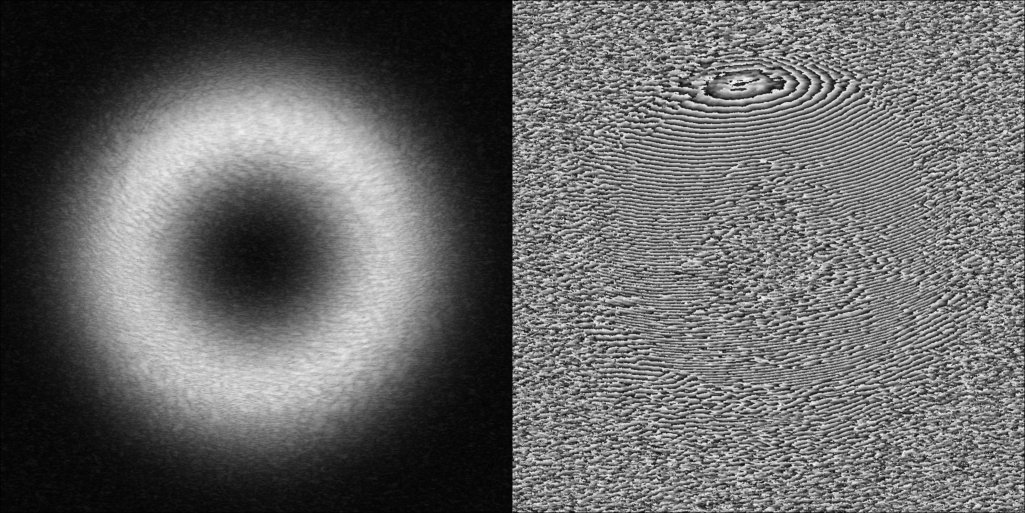

In [62]:
out = sft((beam2|>square|>sqrt) * otphiref)
look(out)

In [63]:
out = sft((beam2 |> square |> sqrt) * otphibig)
look(out)